# Bessel Beam potential

Santi

24 February 2026

The goal here is to calculate the potential of two interfering bessel beams for Rb and Cs to compare with the Gaussian beam approach.

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# ARC (install with: pip install ARC-Alkali-Rydberg-Calculator)
from arc import PairStateInteractions, AlkaliAtom  # species and interactions'
# import all the atoms we might use
from arc import Sodium, Cesium, Rubidium, Potassium

from get_polarizability import *

In [117]:
# constants
h = 6.62607015e-34  # Planck's constant in J*s
hbar = h / (2 * np.pi)  # reduced Planck's constant
c = 299792458  # speed of light in m/s
epsilon_0 = 8.854187817e-12  # vacuum permittivity in F/m
a0 = 5.29177210903e-11  # Bohr radius in meters
e = 1.602176634e-19  # elementary charge in Coulombs
me = 9.10938356e-31  # electron mass in kg
kB = 1.380649e-23  # Boltzmann constant in J/K

wavelength = 1064e-9  # lattice wavelength in meters

alpha_Cs = get_polarizability(wavelength*1e9, "Cs") * a0**3  # Cs polarizability in atomic units
alpha_Rb = get_polarizability(wavelength*1e9, "Rb") * a0**3   # Rb polarizability in atomic units

# convert polarizability from atomic units to SI units
alpha_Cs_SI = alpha_Cs * 4*np.pi * epsilon_0
alpha_Rb_SI = alpha_Rb * 4*np.pi * epsilon_0

print(f"Cs polarizability at {wavelength*1e9} nm: {alpha_Cs/a0**3:.2f} a0^3")
print(f"Rb polarizability at {wavelength*1e9} nm: {alpha_Rb/a0**3:.2f} a0^3")

Cs polarizability at 1064.0 nm: 1167.50 a0^3
Rb polarizability at 1064.0 nm: 687.40 a0^3


In [118]:
# useful functions
from scipy.special import j0

def odt_depth(I, alpha):
    """ calculate ODT depth in Kelvin"""
    U = -0.5 * alpha * I / (c * epsilon_0)  # in Joules
    return -U / kB

def Bessel_beam_intensity(P, beta, w0, rho, z):
    """ calculate the intensity of a Bessel beam at position (rho, z)"""
    zmax = w0 / np.tan(beta)
    k = 2 * np.pi / wavelength
    I = (4*P*k*np.sin(beta)) / w0 * (z/zmax) * (j0(k*rho*np.sin(beta)))**2 * np.exp(-2*z**2 / zmax**2)
    return I

def two_bessel_beam_intensity(I1, I2):
    """ calculate the intensity of two interfering Bessel beams at position"""
    return I1 + I2 + 2 * np.sqrt(I1 * I2) * np.cos(2 * np.pi * z / wavelength)

## First testing the intensity as a function of distance

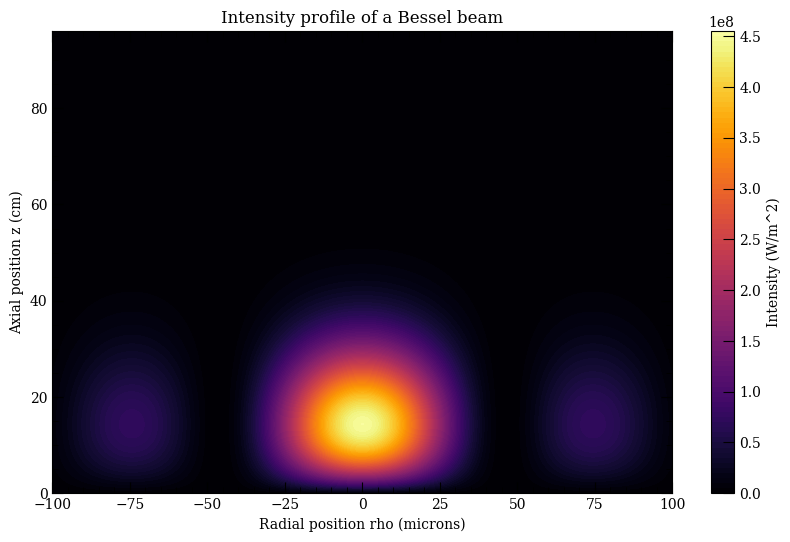

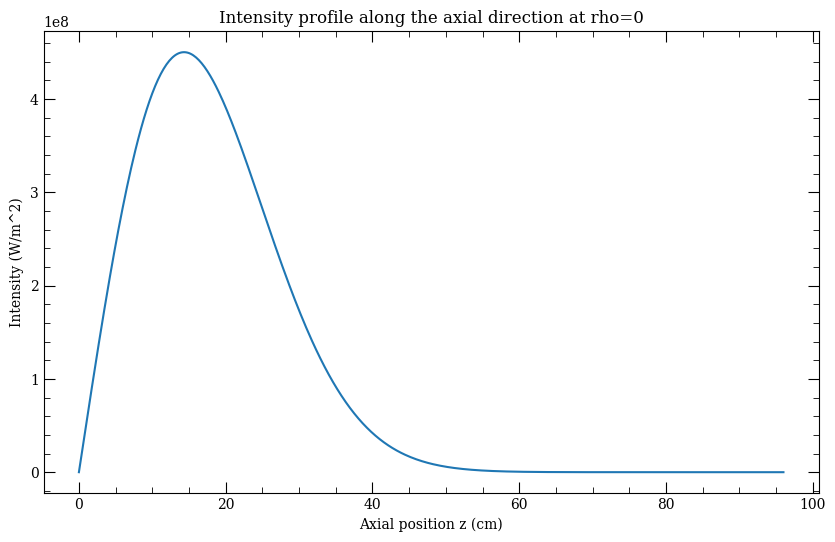

In [165]:
# parameters for the Bessel beam
P = 18.0  # power in Watts
alpha = 1 * np.pi / 180  # axicon angle in radians
w0 = 2.5e-3  # beam waist in meters
n = 1.5 # index of refraction (axicon material, e.g. fused silica)
beta = (n-1) * alpha  # cone angle of the Bessel beam
transport_distance = 0.4  # transport distance in meters
axicon_dist_from_transport = 0.28*2  # distance from axicon to transport region in meters
dist = transport_distance + axicon_dist_from_transport  # total distance from axicon to end of transport

# define the position arrays
z = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho = np.linspace(-100e-6, 100e-6, 500)  # radial positions from 0 to 100 microns

# calculate and visualize the full 3D intensity profile of a single Bessel beam
Z, RHO = np.meshgrid(z, rho)
I = Bessel_beam_intensity(P, beta, w0, RHO, Z)
plt.figure(figsize=(10, 6))
plt.contourf(RHO*1e6, Z*1e2, I, levels=100, cmap='inferno')
plt.colorbar(label='Intensity (W/m^2)')
plt.xlabel('Radial position rho (microns)')
plt.ylabel('Axial position z (cm)')
plt.title('Intensity profile of a Bessel beam')
plt.show()

# now plot the intensity along the axial direction at rho=0
I_axial = Bessel_beam_intensity(P, beta, w0, 0, z)
plt.figure(figsize=(10, 6))
plt.plot(z*1e2, I_axial)
plt.xlabel('Axial position z (cm)')
plt.ylabel('Intensity (W/m^2)')
plt.title('Intensity profile along the axial direction at rho=0')
plt.show()

## Now for two interfering beams

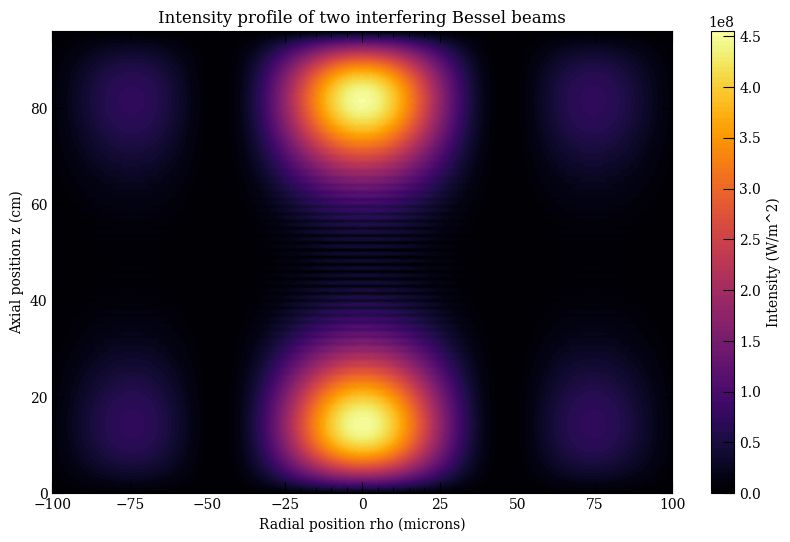

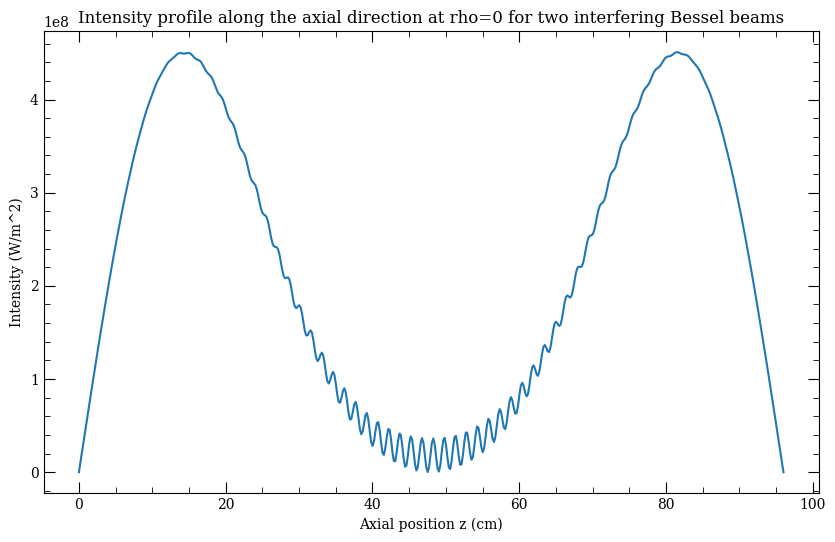

In [166]:
# calculate the intensity of two interfering Bessel beams starting from opposite sides of the z-axis
# define the position arrays
z1 = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho1 = np.linspace(-100e-6, 100e-6, 500)  # radial positions from 0 to 100 microns
# calculate and visualize the full 3D intensity profile of a single Bessel beam
Z1, RHO1 = np.meshgrid(z1, rho1)
I1 = Bessel_beam_intensity(P, beta, w0, RHO1, Z1)
# define the position arrays for the second Bessel beam
z2 = np.linspace(dist, 0, 500)  # axial positions from transport distance to 0 cm
rho2 = np.linspace(-100e-6, 100e-6, 500)  # radial positions from 0 to 100 microns
# calculate and visualize the full 3D intensity profile of the second Bessel beam
Z2, RHO2 = np.meshgrid(z2, rho2)
I2 = Bessel_beam_intensity(P, beta, w0, RHO2, Z2)

I_interference = two_bessel_beam_intensity(I1, I2)
plt.figure(figsize=(10, 6))
plt.contourf(RHO1*1e6, Z1*1e2, I_interference, levels=100, cmap='inferno')
plt.colorbar(label='Intensity (W/m^2)')
plt.xlabel('Radial position rho (microns)')
plt.ylabel('Axial position z (cm)')
plt.title('Intensity profile of two interfering Bessel beams')
plt.show()

# calculate the intensity of two interfering Bessel beams starting from opposite sides of the z-axis
# define the position arrays
z1 = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho1 = 0  # radial positions from 0 to 100 microns
# calculate and visualize the full 3D intensity profile of a single Bessel beam
I1 = Bessel_beam_intensity(P, beta, w0, rho1, z1)
# define the position arrays for the second Bessel beam
z2 = np.linspace(dist, 0, 500)  # axial positions from transport distance to 0 cm
rho2 = 0 # radial positions from 0 to 100 microns
# calculate and visualize the full 3D intensity profile of the second Bessel beam
I2 = Bessel_beam_intensity(P, beta, w0, rho2, z2)

I_interference_axial = two_bessel_beam_intensity(I1, I2)

plt.figure(figsize=(10, 6))
plt.plot(z1*1e2, I_interference_axial)
plt.xlabel('Axial position z (cm)')
plt.ylabel('Intensity (W/m^2)')
plt.title('Intensity profile along the axial direction at rho=0 for two interfering Bessel beams')
plt.show()

## Now the trap depths

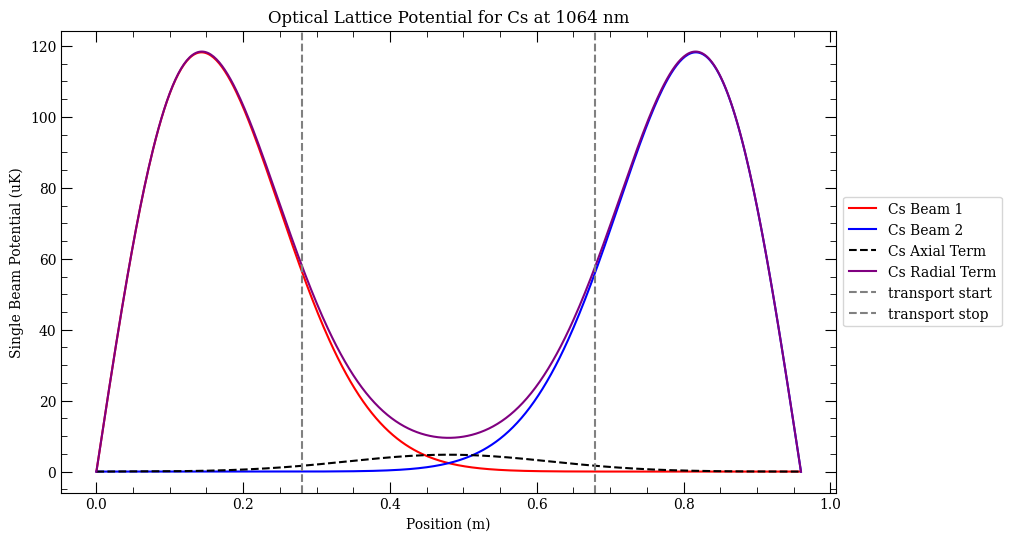

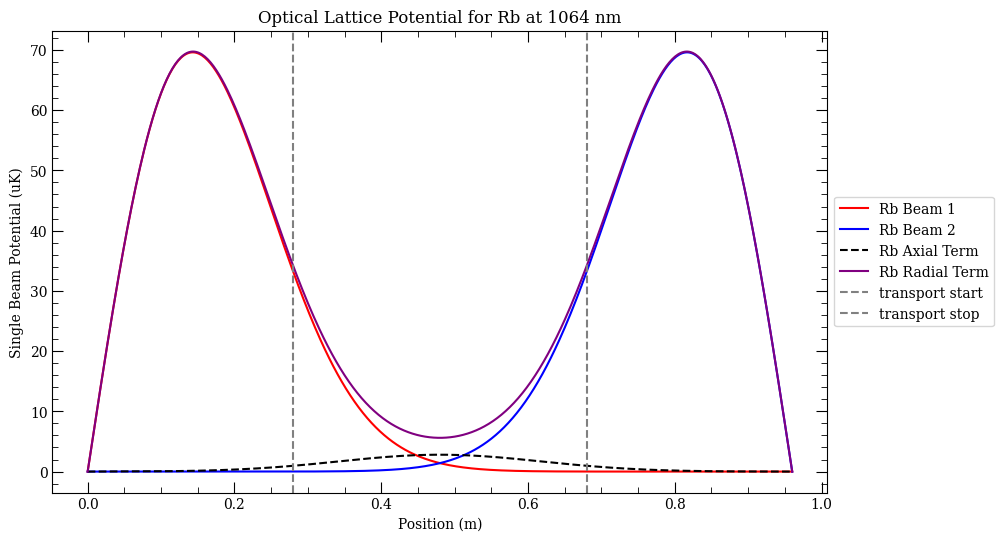

In [167]:
# calculate the intensity of two interfering Bessel beams starting from opposite sides of the z-axis

# define the position arrays
z1 = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho1 = 0  # radial positions from 0 to 100 microns
I1 = Bessel_beam_intensity(P, beta, w0, rho1, z1)
# define the position arrays for the second Bessel beam
z2 = np.linspace(dist, 0, 500)  # axial positions from transport distance to 0 cm
rho2 = 0 # radial positions from 0 to 100 microns
I2 = Bessel_beam_intensity(P, beta, w0, rho2, z2)

# first calculate the potential created by each beam separately
U1_Cs = odt_depth(I1, alpha_Cs_SI) * 1e6  # convert to uK
U2_Cs = odt_depth(I2, alpha_Cs_SI) * 1e6  # convert to uK
# calculate the cross term potential (axial)
U_cross_Cs = odt_depth(np.sqrt(I1*I2), alpha_Cs_SI) * 1e6  # convert to uK
# calculate the radial potential
U_radial_Cs = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Cs_SI) * 1e6  # convert to uK

plt.figure(figsize=(10, 6))
plt.plot(z1, U1_Cs, 'r-', label='Cs Beam 1')
plt.plot(z1, U2_Cs, 'b-', label='Cs Beam 2')
plt.plot(z1, 2*U_cross_Cs, 'k--', label='Cs Axial Term')
plt.plot(z1, U_radial_Cs, 'purple', label='Cs Radial Term')
# plot the positions of the foci
plt.axvline(axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport start')
plt.axvline(transport_distance + axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport stop')
plt.xlabel('Position (m)')
plt.ylabel('Single Beam Potential (uK)')
# put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Optical Lattice Potential for Cs at 1064 nm')
plt.show()


# repeat for Rb
U1_Rb = odt_depth(I1, alpha_Rb_SI) * 1e6  # convert to uK
U2_Rb = odt_depth(I2, alpha_Rb_SI) * 1e6  # convert to uK
# calculate the cross term potential (axial)
U_cross_Rb = odt_depth(np.sqrt(I1*I2), alpha_Rb_SI) * 1e6  # convert to uK
# calculate the radial potential
U_radial_Rb = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Rb_SI) * 1e6  # convert to uK

plt.figure(figsize=(10, 6))
plt.plot(z1, U1_Rb, 'r-', label='Rb Beam 1')
plt.plot(z1, U2_Rb, 'b-', label='Rb Beam 2')
plt.plot(z1, 2*U_cross_Rb, 'k--', label='Rb Axial Term')
plt.plot(z1, U_radial_Rb, 'purple', label='Rb Radial Term')
# plot the positions of the foci
plt.axvline(axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport start')
plt.axvline(transport_distance + axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport stop')
plt.xlabel('Position (m)')
plt.ylabel('Single Beam Potential (uK)')
# put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Optical Lattice Potential for Rb at 1064 nm')
plt.show()

## we can sweep over the Gaussian waist and Axicon angle and see how the trap depth changes.

Optimal parameters for Cs: waist = 3.14 mm, axicon angle = 0.53 degrees
Optimal parameters for Rb: waist = 3.14 mm, axicon angle = 0.53 degrees


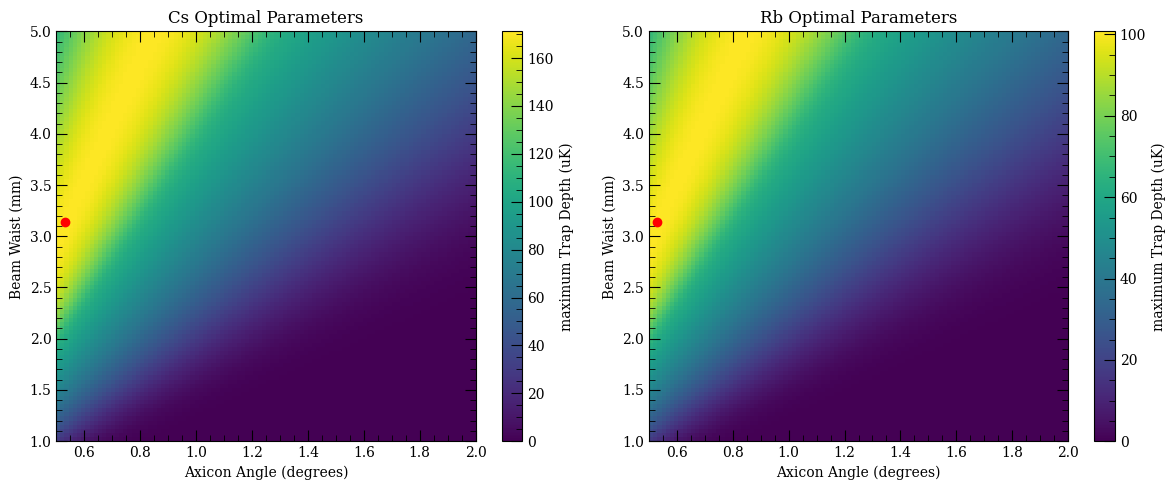

In [164]:
# now 2D sweep of the Gaussian beam waist and axicon angle for two interfering Bessel beams
# define the parameter arrays
waist_array = np.linspace(1e-3, 5e-3, 100)  # beam waist from 1 to 5 mm
axicon_array = np.linspace(0.5, 2, 100) * np.pi / 180  # axicon angle from 0.5 to 2 degrees in radians

# parameters for the Bessel beam
P = 18.0  # power in Watts
n = 1.5 # index of refraction (axicon material, e.g. fused silica)

# define the position arrays
transport_distance = 0.4  # transport distance in meters
axicon_dist_from_transport = 0.28*2  # distance from axicon to transport region in meters
dist = transport_distance + axicon_dist_from_transport  # total distance from axicon to end of transport

z = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho = np.linspace(-100e-6, 100e-6, 500)  # radial positions from 0 to 100 microns

# for the sweep, we find the minimum radial trap depth between the start and stop positions
transport_region = (z >= axicon_dist_from_transport/2) & (z <= transport_distance + axicon_dist_from_transport/2)
max_trap_depth_Cs = []
max_trap_depth_Rb = []

for i, w0 in enumerate(waist_array):
    temp_depths_Cs = []
    temp_depths_Rb = []
    for j, axicon_angle in enumerate(axicon_array):
        beta = (n-1) * axicon_angle  # cone angle of the Bessel beam
        I1 = Bessel_beam_intensity(P, beta, w0, 0, z)
        I2 = Bessel_beam_intensity(P, beta, w0, 0, z[::-1])  # second beam from opposite direction
        U_radial_Cs = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Cs_SI) * 1e6  # convert to uK
        U_radial_Rb = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Rb_SI) * 1e6  # convert to uK
         # find the minimum radial trap depth for each beam
        max_depth_Cs = np.max(U_radial_Cs[transport_region])  # find the maximum potential in the transport region
        max_depth_Rb = np.max(U_radial_Rb[transport_region])

        temp_depths_Cs.append(max_depth_Cs)
        temp_depths_Rb.append(max_depth_Rb)

    # find the minimum trap depth
    max_trap_depth_Cs.append(temp_depths_Cs)
    max_trap_depth_Rb.append(temp_depths_Rb)


# find the optimal parameters for maximum trap depth from above data
max_trap_depth_Cs = np.array(max_trap_depth_Cs)
max_trap_depth_Rb = np.array(max_trap_depth_Rb)

opt_params_Cs = np.unravel_index(np.argmax(max_trap_depth_Cs, axis=None), max_trap_depth_Cs.shape)
opt_params_Rb = np.unravel_index(np.argmax(max_trap_depth_Rb, axis=None), max_trap_depth_Rb.shape)

print(f"Optimal parameters for Cs: waist = {waist_array[opt_params_Cs[0]]*1e3:.2f} mm, axicon angle = {axicon_array[opt_params_Cs[1]]*180/np.pi:.2f} degrees")
print(f"Optimal parameters for Rb: waist = {waist_array[opt_params_Rb[0]]*1e3:.2f} mm, axicon angle = {axicon_array[opt_params_Rb[1]]*180/np.pi:.2f} degrees")

# plot the results of the sweep as a heatmap
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(max_trap_depth_Cs, extent=(axicon_array[0]*180/np.pi, axicon_array[-1]*180/np.pi, waist_array[0]*1e3, waist_array[-1]*1e3), aspect='auto', origin='lower', cmap='viridis')
plt.plot(axicon_array[opt_params_Cs[1]]*180/np.pi, waist_array[opt_params_Cs[0]]*1e3, 'ro', label='Optimal Cs')
plt.colorbar(label='maximum Trap Depth (uK)')
plt.xlabel('Axicon Angle (degrees)')
plt.ylabel('Beam Waist (mm)')
plt.title('Cs Optimal Parameters')

plt.subplot(1, 2, 2)
plt.imshow(max_trap_depth_Rb, extent=(axicon_array[0]*180/np.pi, axicon_array[-1]*180/np.pi, waist_array[0]*1e3, waist_array[-1]*1e3), aspect='auto', origin='lower', cmap='viridis')
plt.plot(axicon_array[opt_params_Rb[1]]*180/np.pi, waist_array[opt_params_Rb[0]]*1e3, 'ro', label='Optimal Rb')
plt.colorbar(label='maximum Trap Depth (uK)')
plt.xlabel('Axicon Angle (degrees)')
plt.ylabel('Beam Waist (mm)')
plt.title('Rb Optimal Parameters')
plt.tight_layout()
plt.show()

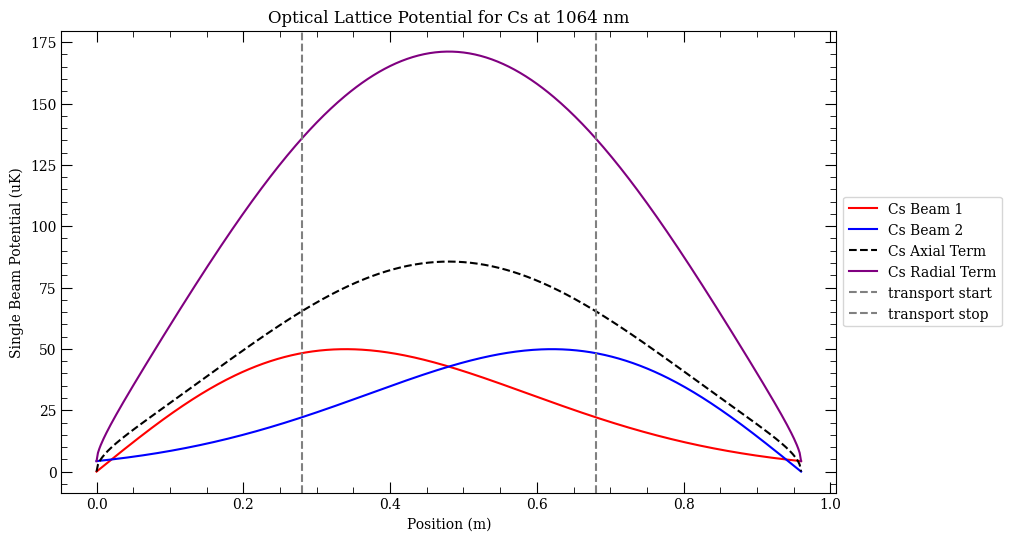

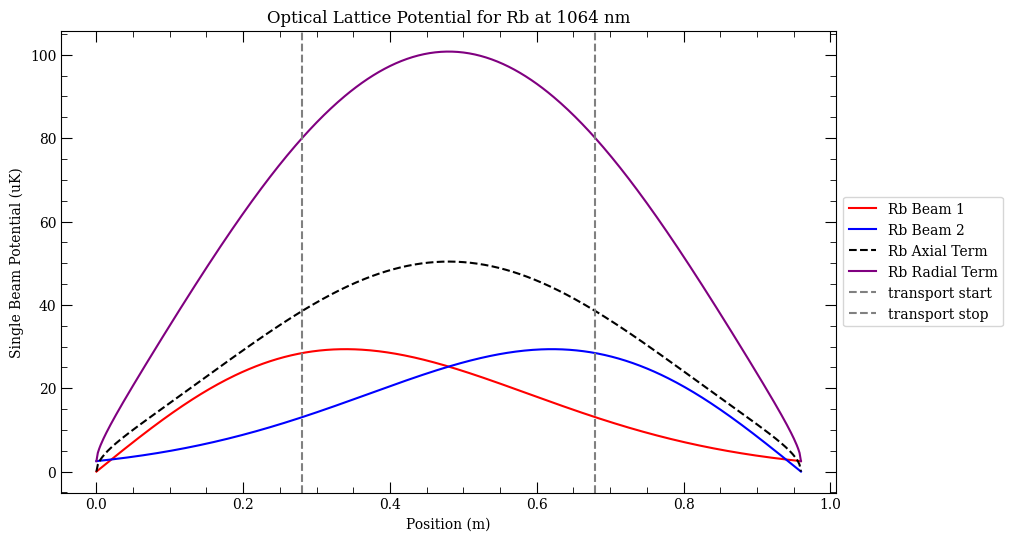

In [ ]:
# calculate the potential of two interfering Bessel beams starting from opposite sides of the z-axis

# parameters for the Bessel beam
P = 18.0  # power in Watts
w0 = waist_array[opt_params_Cs[0]]  # beam waist in meters
n = 1.5 # index of refraction (axicon material, e.g. fused silica)
beta = (n-1) * axicon_array[opt_params_Cs[1]]  # cone angle of the Bessel beam


# define the position arrays
transport_distance = 0.4  # transport distance in meters
axicon_dist_from_transport = 0.28*2  # distance from axicon to transport region in meters
dist = transport_distance + axicon_dist_from_transport  # total distance from axicon to end of transport

z = np.linspace(0, dist, 500)  # axial positions from 0 to transport distance
rho = np.linspace(-100e-6, 100e-6, 500)  # radial positions from 0 to 100 microns

I1 = Bessel_beam_intensity(P, beta, w0, 0, z)
I2 = Bessel_beam_intensity(P, beta, w0, 0, z[::-1])  # second beam from opposite direction

# first calculate the potential created by each beam separately
U1_Cs = odt_depth(I1, alpha_Cs_SI) * 1e6  # convert to uK
U2_Cs = odt_depth(I2, alpha_Cs_SI) * 1e6  # convert to uK
# calculate the cross term potential (axial)
U_cross_Cs = odt_depth(np.sqrt(I1*I2), alpha_Cs_SI) * 1e6  # convert to uK
# calculate the radial potential
U_radial_Cs = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Cs_SI) * 1e6  # convert to uK

plt.figure(figsize=(10, 6))
plt.plot(z, U1_Cs, 'r-', label='Cs Beam 1')
plt.plot(z, U2_Cs, 'b-', label='Cs Beam 2')
plt.plot(z, 2*U_cross_Cs, 'k--', label='Cs Axial Term')
plt.plot(z, U_radial_Cs, 'purple', label='Cs Radial Term')
# plot the positions of the foci
plt.axvline(axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport start')
plt.axvline(transport_distance + axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport stop')
plt.xlabel('Position (m)')
plt.ylabel('Single Beam Potential (uK)')
# put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Optical Lattice Potential for Cs at 1064 nm')
plt.show()

# repeat for Rb
U1_Rb = odt_depth(I1, alpha_Rb_SI) * 1e6  # convert to uK
U2_Rb = odt_depth(I2, alpha_Rb_SI) * 1e6  # convert to uK
# calculate the cross term potential (axial)
U_cross_Rb = odt_depth(np.sqrt(I1*I2), alpha_Rb_SI) * 1e6  # convert to uK
# calculate the radial potential
U_radial_Rb = odt_depth(I1+I2+2*np.sqrt(I1*I2), alpha_Rb_SI) * 1e6  # convert to uK

plt.figure(figsize=(10, 6))
plt.plot(z, U1_Rb, 'r-', label='Rb Beam 1')
plt.plot(z, U2_Rb, 'b-', label='Rb Beam 2')
plt.plot(z, 2*U_cross_Rb, 'k--', label='Rb Axial Term')
plt.plot(z, U_radial_Rb, 'purple', label='Rb Radial Term')
# plot the positions of the foci
plt.axvline(axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport start')
plt.axvline(transport_distance + axicon_dist_from_transport/2, color='grey', linestyle='--', label='transport stop')
plt.xlabel('Position (m)')
plt.ylabel('Single Beam Potential (uK)')
# put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Optical Lattice Potential for Rb at 1064 nm')
plt.show()